In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, f1_score, matthews_corrcoef
from collections import defaultdict
from scipy.spatial import distance
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
credit = pd.read_csv('/Users/azulmakk/Universidad/Analisis Multivariado/Final/credit_risk_dataset.csv', header=0)

selected_columns = ['loan_amnt', 'loan_percent_income', 'person_emp_length', 'loan_int_rate', 'loan_grade']
selected_credit = credit[selected_columns]

selected_credit.iloc[:, :4] = selected_credit.iloc[:, :4].apply(pd.to_numeric, errors='coerce')

selected_credit = selected_credit.dropna()

selected_credit['loan_grade'] = selected_credit['loan_grade'].astype('category')

selected_cat = ["A", "B", "C"]
sample = selected_credit[selected_credit['loan_grade'].isin(selected_cat)]

loan_grade_counts = sample['loan_grade'].value_counts()
print(f'Conteo de categorías de préstamos:\n{loan_grade_counts}\n')
sample_size = 350
sample = sample.sample(n=sample_size, random_state=42)

X = sample.iloc[:, :-1]
y = sample['loan_grade']

Conteo de categorías de préstamos:
loan_grade
A    9402
B    9151
C    5699
D       0
E       0
F       0
G       0
Name: count, dtype: int64



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el conjunto de redes neuronales mediante Bagging
num_networks = 20
num_hidden_units = 10
nnee_classifier = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(num_hidden_units,)),
                                    n_estimators=num_networks, random_state=42)

nnee_classifier.fit(X_train, y_train)

y_pred = nnee_classifier.predict(X_test)

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del clasificador NNEE: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión: {precision:.2f}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

mcc = matthews_corrcoef(y_test, y_pred)
print(f'Coeficiente de Correlación de Matthews: {mcc:.2f}')

Matriz de Confusión:
[[ 2 24  0]
 [ 3 28  1]
 [ 2  9  1]]
Exactitud del clasificador NNEE: 0.44
Precisión: 0.40
F1 Score: 0.34
Coeficiente de Correlación de Matthews: 0.01


# NNEE Pesos ponderados

In [25]:
def weighted_distance(distances):
    return 1 / (distances**2 + 1e-6)

knn_classifier = KNeighborsClassifier(weights=weighted_distance)

num_networks = 15
num_hidden_units = 15
nnee_classifier = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(num_hidden_units,)),
                                    n_estimators=num_networks, random_state=42)

knn_classifier.fit(X_train, y_train)
nnee_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión KNN:")
print(conf_matrix_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Exactitud del clasificador KNN con pesos ponderados: {accuracy_knn:.2f}')

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print(f'Precisión KNN: {precision_knn:.2f}')

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f'F1 Score KNN: {f1_knn:.2f}')

mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
print(f'Coeficiente de Correlación de Matthews KNN: {mcc_knn:.2f}')

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Matriz de Confusión KNN:
[[15 10  1]
 [ 7 20  5]
 [ 1  5  6]]
Exactitud del clasificador KNN con pesos ponderados: 0.59
Precisión KNN: 0.59
F1 Score KNN: 0.59
Coeficiente de Correlación de Matthews KNN: 0.33


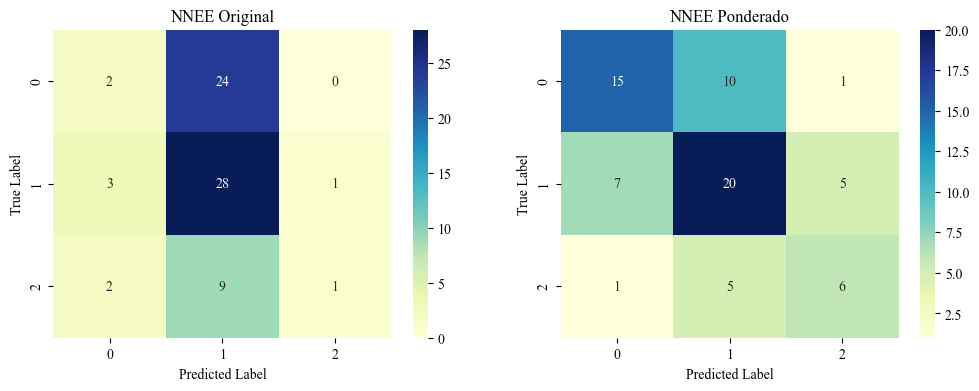

In [30]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']

def plot_confusion_matrix_heatmapGreys(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm_chebyshev = confusion_matrix(y_test, y_pred)
plot_confusion_matrix_heatmapGreys(axes[0], cm_chebyshev, 'NNEE Original')

cm_chebyshevNorm = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix_heatmapGreys(axes[1], cm_chebyshevNorm, 'NNEE Ponderado')
